# Imports

In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
import pyarrow
import openpyxl
import re
import seaborn as sns


# Load and Explore Data

In [4]:
# Encoding of the CSV-Files:
! file -i "_data/a557275f-4c30-47fd-a991-b3eb61a3ad80_Series - Metadata.csv"
! file -i "_data/a557275f-4c30-47fd-a991-b3eb61a3ad80_Data.csv"

_data/a557275f-4c30-47fd-a991-b3eb61a3ad80_Series - Metadata.csv: text/csv; charset=us-ascii


_data/a557275f-4c30-47fd-a991-b3eb61a3ad80_Data.csv: text/csv; charset=us-ascii


In [5]:
# Read data and meta data
data_pdf = pd.read_csv('_data/a557275f-4c30-47fd-a991-b3eb61a3ad80_Data.csv', encoding='us-ascii', sep=',', decimal='.')
# meta_data_pdf = pd.read_csv('_data/a557275f-4c30-47fd-a991-b3eb61a3ad80_Series - Metadata.csv', encoding='us-ascii', sep=',', delimiter='.'))

In [6]:
data_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14635 entries, 0 to 14634
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   14632 non-null  object
 1   Country Code   14630 non-null  object
 2   Series Name    14630 non-null  object
 3   Series Code    14630 non-null  object
 4   1960 [YR1960]  14630 non-null  object
 5   1961 [YR1961]  14630 non-null  object
 6   1962 [YR1962]  14630 non-null  object
 7   1963 [YR1963]  14630 non-null  object
 8   1964 [YR1964]  14630 non-null  object
 9   1965 [YR1965]  14630 non-null  object
 10  1966 [YR1966]  14630 non-null  object
 11  1967 [YR1967]  14630 non-null  object
 12  1968 [YR1968]  14630 non-null  object
 13  1969 [YR1969]  14630 non-null  object
 14  1970 [YR1970]  14630 non-null  object
 15  1971 [YR1971]  14630 non-null  object
 16  1972 [YR1972]  14630 non-null  object
 17  1973 [YR1973]  14630 non-null  object
 18  1974 [YR1974]  14630 non-n

In [7]:
data_pdf.tail()

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
14630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14633,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14634,Last Updated: 01/28/2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data_pdf.describe()

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
count,14632,14630,14630,14630,14630,14630,14630,14630,14630,14630,...,14630,14630,14630,14630,14630,14630,14630,14630,14630,14630
unique,268,266,55,55,1548,2252,2289,2326,2342,2463,...,10240,9610,9209,9358,9148,9173,9049,8917,7005,4949
top,World,WLD,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
freq,55,55,266,266,12758,12291,12239,12212,12189,11809,...,3699,4356,4784,4635,4855,4836,4990,5117,7103,9570


In [9]:
data_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14635 entries, 0 to 14634
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   14632 non-null  object
 1   Country Code   14630 non-null  object
 2   Series Name    14630 non-null  object
 3   Series Code    14630 non-null  object
 4   1960 [YR1960]  14630 non-null  object
 5   1961 [YR1961]  14630 non-null  object
 6   1962 [YR1962]  14630 non-null  object
 7   1963 [YR1963]  14630 non-null  object
 8   1964 [YR1964]  14630 non-null  object
 9   1965 [YR1965]  14630 non-null  object
 10  1966 [YR1966]  14630 non-null  object
 11  1967 [YR1967]  14630 non-null  object
 12  1968 [YR1968]  14630 non-null  object
 13  1969 [YR1969]  14630 non-null  object
 14  1970 [YR1970]  14630 non-null  object
 15  1971 [YR1971]  14630 non-null  object
 16  1972 [YR1972]  14630 non-null  object
 17  1973 [YR1973]  14630 non-null  object
 18  1974 [YR1974]  14630 non-n

# Extract the Countries

Obviously there are also regions reflected in the data and not only countries. Added the pycountry package to extract countries from the dataframe.

In [10]:
# Extract alpha-3 country codes
alpha_3_codes_list = [country.alpha_3 for country in pycountry.countries]

alpha_3_codes_set = set(alpha_3_codes_list)

len(alpha_3_codes_set)

249

In [11]:
data_onlycountries_pdf = data_pdf[data_pdf['Country Code'].isin(alpha_3_codes_list)]

In [12]:
data_onlycountries_pdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11825 entries, 0 to 11934
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   11825 non-null  object
 1   Country Code   11825 non-null  object
 2   Series Name    11825 non-null  object
 3   Series Code    11825 non-null  object
 4   1960 [YR1960]  11825 non-null  object
 5   1961 [YR1961]  11825 non-null  object
 6   1962 [YR1962]  11825 non-null  object
 7   1963 [YR1963]  11825 non-null  object
 8   1964 [YR1964]  11825 non-null  object
 9   1965 [YR1965]  11825 non-null  object
 10  1966 [YR1966]  11825 non-null  object
 11  1967 [YR1967]  11825 non-null  object
 12  1968 [YR1968]  11825 non-null  object
 13  1969 [YR1969]  11825 non-null  object
 14  1970 [YR1970]  11825 non-null  object
 15  1971 [YR1971]  11825 non-null  object
 16  1972 [YR1972]  11825 non-null  object
 17  1973 [YR1973]  11825 non-null  object
 18  1974 [YR1974]  11825 non-null  

How many countries are in the data?

In [13]:
countries_in_data_list = list(data_onlycountries_pdf['Country Code'])

countries_in_data_set = set(countries_in_data_list)

len(countries_in_data_set)

215

Which countries are missing?

In [14]:
missing_countries = alpha_3_codes_set - countries_in_data_set

print(missing_countries)

{'MYT', 'REU', 'BLM', 'SJM', 'SGS', 'BES', 'CXR', 'ATA', 'MTQ', 'UMI', 'GUF', 'AIA', 'ESH', 'NIU', 'IOT', 'SHN', 'VAT', 'WLF', 'HMD', 'NFK', 'MSR', 'TKL', 'FLK', 'ATF', 'PCN', 'SPM', 'ALA', 'CCK', 'GLP', 'GGY', 'COK', 'BVT', 'JEY', 'TWN'}


# Prepare Table Data

In [15]:
# Convert values in year columns to numeric values

# Determine columns with years
data_columns_list = list(data_onlycountries_pdf.columns)
data_columns_year_list = [column for column in data_columns_list if re.fullmatch(r"^\d{4} \[YR\d{4}\]$", column)]

data_onlycountries_pdf[data_columns_year_list] = data_onlycountries_pdf[data_columns_year_list].apply(pd.to_numeric, errors='coerce')
# data_onlycountries_pdf['1960 [YR1960]'] = pd.to_numeric(data_onlycountries_pdf['1960 [YR1960]'], errors='coerce')

/tmp/ipykernel_6429/214051053.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_onlycountries_pdf[data_columns_year_list] = data_onlycountries_pdf[data_columns_year_list].apply(pd.to_numeric, errors='coerce')


# Drop Not Necessary Columns

Drop Years Before 1980 and After 2020, because they are only sparsely filled. 

In [16]:
data_columns_drop_list = data_columns_list[20:-3]
data_columns_selected_list = data_columns_list[0:3] + data_columns_list[24:]
data_columns_selected_list

['Country Name',
 'Country Code',
 'Series Name',
 '1980 [YR1980]',
 '1981 [YR1981]',
 '1982 [YR1982]',
 '1983 [YR1983]',
 '1984 [YR1984]',
 '1985 [YR1985]',
 '1986 [YR1986]',
 '1987 [YR1987]',
 '1988 [YR1988]',
 '1989 [YR1989]',
 '1990 [YR1990]',
 '1991 [YR1991]',
 '1992 [YR1992]',
 '1993 [YR1993]',
 '1994 [YR1994]',
 '1995 [YR1995]',
 '1996 [YR1996]',
 '1997 [YR1997]',
 '1998 [YR1998]',
 '1999 [YR1999]',
 '2000 [YR2000]',
 '2001 [YR2001]',
 '2002 [YR2002]',
 '2003 [YR2003]',
 '2004 [YR2004]',
 '2005 [YR2005]',
 '2006 [YR2006]',
 '2007 [YR2007]',
 '2008 [YR2008]',
 '2009 [YR2009]',
 '2010 [YR2010]',
 '2011 [YR2011]',
 '2012 [YR2012]',
 '2013 [YR2013]',
 '2014 [YR2014]',
 '2015 [YR2015]',
 '2016 [YR2016]',
 '2017 [YR2017]',
 '2018 [YR2018]',
 '2019 [YR2019]',
 '2020 [YR2020]',
 '2021 [YR2021]',
 '2022 [YR2022]',
 '2023 [YR2023]']

In [17]:
data_pdf = data_onlycountries_pdf[data_columns_selected_list]

data_pdf

,Country Name,Country Code,Series Name,1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Afghanistan,AFG,Access to clean fuels and technologies for coo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.610000e+01,2.760000e+01,2.880000e+01,3.030000e+01,3.140000e+01,3.260000e+01,3.380000e+01,3.490000e+01,3.610000e+01,NaN
1,Afghanistan,AFG,Access to electricity (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.950000e+01,7.150000e+01,9.770000e+01,9.770000e+01,9.340000e+01,9.770000e+01,9.770000e+01,9.770000e+01,8.530000e+01,NaN
2,Afghanistan,AFG,"Educational attainment, at least Bachelor's or...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.911332e+00,NaN,NaN,5.261417e+00,NaN,NaN,4.323430e+00,3.070000e+00,3.984250e+00,NaN
3,Afghanistan,AFG,Current health expenditure (% of GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.528878e+00,1.010535e+01,1.181859e+01,1.262082e+01,1.420842e+01,1.483132e+01,1.553361e+01,2.182795e+01,NaN,NaN
4,Afghanistan,AFG,GDP per capita (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.250549e+02,5.655697e+02,5.220822e+02,5.254698e+02,4.913372e+02,4.966025e+02,5.107871e+02,3.564962e+02,3.572612e+02,4.157074e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11930,Zimbabwe,ZWE,"Manufacturing, value added (current US$)",1.384407e+09,1.632955e+09,1.638200e+09,1.577868e+09,1.301161e+09,1.022906e+09,1.211463e+09,...,2.454635e+09,2.373335e+09,2.382829e+09,7.164196e+09,4.671914e+09,3.657623e+09,4.217343e+09,3.389519e+09,6.732872e+09,5.788328e+09
11931,Zimbabwe,ZWE,Military expenditure (% of general government ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.232506e+00,9.193971e+00,7.363048e+00,5.542350e+00,5.607096e+00,5.504620e+00,6.872332e+00,7.722033e+00,4.896716e+00,1.380527e+00
11932,Zimbabwe,ZWE,Military expenditure (current LCU),4.427500e+08,3.897000e+08,4.374500e+08,4.317500e+08,3.606500e+08,3.093000e+08,3.422000e+08,...,3.681000e+08,3.766770e+08,3.580650e+08,3.405220e+08,4.203640e+08,1.367348e+09,1.186680e+10,4.312902e+10,1.124585e+11,3.262385e+11
11933,Zimbabwe,ZWE,Military expenditure (current USD),4.427500e+08,3.897000e+08,4.374500e+08,4.317500e+08,3.606500e+08,3.093000e+08,3.422000e+08,...,3.681000e+08,3.766770e+08,3.580650e+08,3.405220e+08,4.203640e+08,5.469390e+08,2.421796e+08,4.739453e+08,3.327173e+08,8.704335e+08


# Select Three Countries

In [18]:
data_pdf = data_pdf[data_pdf['Country Name'].isin(['Germany', 'France', 'United States'])]

data_pdf

,Country Name,Country Code,Series Name,1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
3740,France,FRA,Access to clean fuels and technologies for coo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,NaN
3741,France,FRA,Access to electricity (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,NaN
3742,France,FRA,"Educational attainment, at least Bachelor's or...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.639000e+01,1.766000e+01,1.740000e+01,1.800000e+01,1.922301e+01,1.970000e+01,2.097878e+01,2.293775e+01,2.255778e+01,2.435462e+01
3743,France,FRA,Current health expenditure (% of GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.153937e+01,1.144817e+01,1.147060e+01,1.135469e+01,1.120799e+01,1.108886e+01,1.213096e+01,1.230787e+01,NaN,NaN
3744,France,FRA,GDP per capita (current US$),1.256516e+04,1.095590e+04,1.035989e+04,9.862284e+03,9.311894e+03,9.657019e+03,1.343048e+04,...,4.314805e+04,3.670243e+04,3.702422e+04,3.868716e+04,4.141818e+04,4.040828e+04,3.916986e+04,4.372510e+04,4.108281e+04,4.469093e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11380,United States,USA,"Manufacturing, value added (current US$)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.045615e+12,2.123243e+12,2.098272e+12,2.192925e+12,2.330107e+12,2.364316e+12,2.238531e+12,2.497132e+12,NaN,NaN
11381,United States,USA,Military expenditure (% of general government ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.041803e+01,9.892660e+00,9.626809e+00,9.367407e+00,9.349505e+00,9.549711e+00,8.246694e+00,8.038668e+00,9.323326e+00,9.055287e+00
11382,United States,USA,Military expenditure (current LCU),1.436884e+11,1.765589e+11,2.216735e+11,2.234272e+11,2.451492e+11,2.721632e+11,2.955462e+11,...,6.477890e+11,6.338296e+11,6.398564e+11,6.467529e+11,6.824914e+11,7.343441e+11,7.783972e+11,8.062302e+11,8.606922e+11,9.160147e+11
11383,United States,USA,Military expenditure (current USD),1.436884e+11,1.765589e+11,2.216735e+11,2.234272e+11,2.451492e+11,2.721632e+11,2.955462e+11,...,6.477890e+11,6.338296e+11,6.398564e+11,6.467529e+11,6.824914e+11,7.343441e+11,7.783972e+11,8.062302e+11,8.606922e+11,9.160147e+11


# Drop All NaN Values

In [19]:
data_pdf = data_pdf.dropna()

data_pdf

,Country Name,Country Code,Series Name,1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
3744,France,FRA,GDP per capita (current US$),1.256516e+04,1.095590e+04,1.035989e+04,9.862284e+03,9.311894e+03,9.657019e+03,1.343048e+04,...,4.314805e+04,3.670243e+04,3.702422e+04,3.868716e+04,4.141818e+04,4.040828e+04,3.916986e+04,4.372510e+04,4.108281e+04,4.469093e+04
3745,France,FRA,Gross domestic savings (% of GDP),2.487193e+01,2.260795e+01,2.180306e+01,2.190980e+01,2.182231e+01,2.122008e+01,2.207244e+01,...,2.112083e+01,2.159884e+01,2.125152e+01,2.140922e+01,2.164528e+01,2.237520e+01,2.107997e+01,2.223510e+01,2.140632e+01,2.115387e+01
3746,France,FRA,"Manufacturing, value added (% of GDP)",1.836605e+01,1.789041e+01,1.730126e+01,1.730589e+01,1.707066e+01,1.711759e+01,1.675955e+01,...,1.018150e+01,1.031991e+01,1.016523e+01,1.001005e+01,9.886205e+00,9.910950e+00,9.245667e+00,9.095825e+00,9.543883e+00,9.731756e+00
3747,France,FRA,Military expenditure (% of GDP),3.155205e+00,3.246133e+00,3.223839e+00,3.237132e+00,3.187369e+00,3.143933e+00,3.085765e+00,...,1.862961e+00,1.872258e+00,1.917282e+00,1.908642e+00,1.843009e+00,1.836461e+00,1.996478e+00,1.914406e+00,1.932424e+00,2.056387e+00
3749,France,FRA,External balance on goods and services (% of GDP),-1.244458e+00,-1.244260e+00,-2.373652e+00,-1.143489e-01,4.117787e-01,-5.229572e-02,2.634742e-01,...,-7.156411e-01,-1.176977e-01,-3.463363e-01,-7.721801e-01,-9.662970e-01,-6.498584e-01,-1.724445e+00,-1.212383e+00,-2.782806e+00,-1.999494e+00
3750,France,FRA,GDP (current US$),6.945292e+11,6.091848e+11,5.781523e+11,5.533563e+11,5.250333e+11,5.472210e+11,7.649466e+11,...,2.861236e+12,2.442483e+12,2.470408e+12,2.588868e+12,2.781576e+12,2.722794e+12,2.647926e+12,2.966434e+12,2.796302e+12,3.051832e+12
3751,France,FRA,GDP per capita growth (annual %),1.134990e+00,5.892851e-01,2.069073e+00,7.178486e-01,1.114328e+00,1.062652e+00,1.867515e+00,...,5.193838e-01,7.080306e-01,5.942438e-01,1.787795e+00,1.282166e+00,1.688708e+00,-7.740568e+00,6.501552e+00,2.235989e+00,6.076492e-01
3754,France,FRA,"Industry (including construction), value added...",2.759137e+01,2.685596e+01,2.623989e+01,2.601754e+01,2.553721e+01,2.538755e+01,2.525337e+01,...,1.734162e+01,1.723644e+01,1.694336e+01,1.674830e+01,1.672528e+01,1.690700e+01,1.627265e+01,1.608773e+01,1.619809e+01,1.847019e+01
3756,France,FRA,"Services, value added (% of GDP)",5.801377e+01,5.895479e+01,5.887980e+01,5.956394e+01,6.024371e+01,6.023296e+01,6.077155e+01,...,7.042824e+01,7.030901e+01,7.060300e+01,7.038518e+01,7.013670e+01,7.011016e+01,7.097702e+01,7.067357e+01,7.133787e+01,6.966108e+01
3757,France,FRA,"Inflation, GDP deflator (annual %)",1.154609e+01,1.148078e+01,1.203271e+01,9.612537e+00,7.073275e+00,5.504142e+00,5.239415e+00,...,5.707951e-01,1.134440e+00,5.172582e-01,5.863432e-01,1.114593e+00,1.210523e+00,2.977979e+00,1.221816e+00,3.220632e+00,5.303572e+00


# Check How Much Series Names Remain per Country

In [20]:
data_pivot_pdf = data_pdf.pivot(index='Country Name', columns='Series Name', values='Series Name')

data_pivot_pdf.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, France to United States
Data columns (total 21 columns):
 #   Column                                                                      Non-Null Count  Dtype 
---  ------                                                                      --------------  ----- 
 0   Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)  3 non-null      object
 1   Expense (% of GDP)                                                          1 non-null      object
 2   External balance on goods and services (% of GDP)                           3 non-null      object
 3   GDP (current US$)                                                           3 non-null      object
 4   GDP growth (annual %)                                                       3 non-null      object
 5   GDP per capita (constant LCU)                                               3 non-null      object
 6   GDP per capita (current US$)                      

In [21]:
# Drop Columns with NaN

data_pivot_pdf = data_pivot_pdf.dropna(axis=1)

data_pivot_pdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, France to United States
Data columns (total 12 columns):
 #   Column                                                                      Non-Null Count  Dtype 
---  ------                                                                      --------------  ----- 
 0   Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)  3 non-null      object
 1   External balance on goods and services (% of GDP)                           3 non-null      object
 2   GDP (current US$)                                                           3 non-null      object
 3   GDP growth (annual %)                                                       3 non-null      object
 4   GDP per capita (constant LCU)                                               3 non-null      object
 5   GDP per capita (current US$)                                                3 non-null      object
 6   GDP per capita growth (annual %)                  

In [22]:
# Print list with columsn for easier selection later
list(data_pivot_pdf.columns)

['Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)',
 'External balance on goods and services (% of GDP)',
 'GDP (current US$)',
 'GDP growth (annual %)',
 'GDP per capita (constant LCU)',
 'GDP per capita (current US$)',
 'GDP per capita growth (annual %)',
 'Gross domestic savings (% of GDP)',
 'Inflation, GDP deflator (annual %)',
 'Military expenditure (% of GDP)',
 'Military expenditure (current LCU)',
 'Military expenditure (current USD)']

# Select Relevant Features

In [23]:
filter_columns = [
    "Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)",
    "Death rate, crude (per 1,000 people)",
    "External balance on goods and services (% of GDP)",
    "GDP (current US$)",
    "GDP growth (annual %)",
    "GDP per capita (current US$)",
    "GDP per capita growth (annual %)",
    "Gross domestic savings (% of GDP)",
    "Inflation, GDP deflator (annual %)",
    "Land area (sq. km)",
    "Life expectancy at birth, total (years)",
    "Military expenditure (% of GDP)",
    "Military expenditure (current USD)",
    "Tax revenue (% of GDP)",
]

# filter features
data_pdf = data_pdf[data_pdf['Series Name'].isin(filter_columns)]

data_pdf

,Country Name,Country Code,Series Name,1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
3744,France,FRA,GDP per capita (current US$),1.256516e+04,1.095590e+04,1.035989e+04,9.862284e+03,9.311894e+03,9.657019e+03,1.343048e+04,...,4.314805e+04,3.670243e+04,3.702422e+04,3.868716e+04,4.141818e+04,4.040828e+04,3.916986e+04,4.372510e+04,4.108281e+04,4.469093e+04
3745,France,FRA,Gross domestic savings (% of GDP),2.487193e+01,2.260795e+01,2.180306e+01,2.190980e+01,2.182231e+01,2.122008e+01,2.207244e+01,...,2.112083e+01,2.159884e+01,2.125152e+01,2.140922e+01,2.164528e+01,2.237520e+01,2.107997e+01,2.223510e+01,2.140632e+01,2.115387e+01
3747,France,FRA,Military expenditure (% of GDP),3.155205e+00,3.246133e+00,3.223839e+00,3.237132e+00,3.187369e+00,3.143933e+00,3.085765e+00,...,1.862961e+00,1.872258e+00,1.917282e+00,1.908642e+00,1.843009e+00,1.836461e+00,1.996478e+00,1.914406e+00,1.932424e+00,2.056387e+00
3749,France,FRA,External balance on goods and services (% of GDP),-1.244458e+00,-1.244260e+00,-2.373652e+00,-1.143489e-01,4.117787e-01,-5.229572e-02,2.634742e-01,...,-7.156411e-01,-1.176977e-01,-3.463363e-01,-7.721801e-01,-9.662970e-01,-6.498584e-01,-1.724445e+00,-1.212383e+00,-2.782806e+00,-1.999494e+00
3750,France,FRA,GDP (current US$),6.945292e+11,6.091848e+11,5.781523e+11,5.533563e+11,5.250333e+11,5.472210e+11,7.649466e+11,...,2.861236e+12,2.442483e+12,2.470408e+12,2.588868e+12,2.781576e+12,2.722794e+12,2.647926e+12,2.966434e+12,2.796302e+12,3.051832e+12
3751,France,FRA,GDP per capita growth (annual %),1.134990e+00,5.892851e-01,2.069073e+00,7.178486e-01,1.114328e+00,1.062652e+00,1.867515e+00,...,5.193838e-01,7.080306e-01,5.942438e-01,1.787795e+00,1.282166e+00,1.688708e+00,-7.740568e+00,6.501552e+00,2.235989e+00,6.076492e-01
3757,France,FRA,"Inflation, GDP deflator (annual %)",1.154609e+01,1.148078e+01,1.203271e+01,9.612537e+00,7.073275e+00,5.504142e+00,5.239415e+00,...,5.707951e-01,1.134440e+00,5.172582e-01,5.863432e-01,1.114593e+00,1.210523e+00,2.977979e+00,1.221816e+00,3.220632e+00,5.303572e+00
3760,France,FRA,GDP growth (annual %),1.676413e+00,1.188315e+00,2.442513e+00,1.262058e+00,1.609471e+00,1.569074e+00,2.389536e+00,...,9.978329e-01,1.066755e+00,8.600311e-01,2.083615e+00,1.645909e+00,2.027446e+00,-7.440646e+00,6.882338e+00,2.570840e+00,9.364875e-01
3765,France,FRA,Carbon dioxide (CO2) emissions excluding LULUC...,9.173360e+00,8.213742e+00,7.806652e+00,7.423744e+00,7.182425e+00,6.965543e+00,6.717483e+00,...,4.947635e+00,5.003509e+00,5.032181e+00,5.071068e+00,4.893363e+00,4.789885e+00,4.250290e+00,4.708307e+00,4.561196e+00,4.135860e+00
3793,France,FRA,Military expenditure (current USD),2.219818e+10,2.004775e+10,1.891849e+10,1.818852e+10,1.697787e+10,1.745515e+10,2.390144e+10,...,5.313475e+10,4.564747e+10,4.737059e+10,4.919566e+10,5.140981e+10,5.011893e+10,5.274706e+10,5.664700e+10,5.363875e+10,6.130129e+10


In [24]:
data_melt_pdf = data_pdf.melt(id_vars=['Country Name', 'Country Code', 'Series Name'], var_name='Year', value_name='Value')

data_melt_pdf['Year'] = data_melt_pdf['Year'].str[:4]

data_melt_pdf['Year'] = pd.to_numeric(data_melt_pdf['Year'])

data_melt_pdf

,Country Name,Country Code,Series Name,Year,Value
0,France,FRA,GDP per capita (current US$),1980,1.256516e+04
1,France,FRA,Gross domestic savings (% of GDP),1980,2.487193e+01
2,France,FRA,Military expenditure (% of GDP),1980,3.155205e+00
3,France,FRA,External balance on goods and services (% of GDP),1980,-1.244458e+00
4,France,FRA,GDP (current US$),1980,6.945292e+11
...,...,...,...,...,...
1359,United States,USA,Tax revenue (% of GDP),2023,1.022381e+01
1360,United States,USA,"Inflation, GDP deflator (annual %)",2023,3.598391e+00
1361,United States,USA,GDP growth (annual %),2023,2.887556e+00
1362,United States,USA,Carbon dioxide (CO2) emissions excluding LULUC...,2023,1.397979e+01


In [25]:
country_numeric_dict = dict(enumerate(set(data_melt_pdf['Country Code'])))

country_numeric_dict = {v: k for k, v in country_numeric_dict.items()}



data_melt_pdf['Country Numeric'] = data_melt_pdf['Country Code'].map(country_numeric_dict)

data_melt_pdf

,Country Name,Country Code,Series Name,Year,Value,Country Numeric
0,France,FRA,GDP per capita (current US$),1980,1.256516e+04,1
1,France,FRA,Gross domestic savings (% of GDP),1980,2.487193e+01,1
2,France,FRA,Military expenditure (% of GDP),1980,3.155205e+00,1
3,France,FRA,External balance on goods and services (% of GDP),1980,-1.244458e+00,1
4,France,FRA,GDP (current US$),1980,6.945292e+11,1
...,...,...,...,...,...,...
1359,United States,USA,Tax revenue (% of GDP),2023,1.022381e+01,0
1360,United States,USA,"Inflation, GDP deflator (annual %)",2023,3.598391e+00,0
1361,United States,USA,GDP growth (annual %),2023,2.887556e+00,0
1362,United States,USA,Carbon dioxide (CO2) emissions excluding LULUC...,2023,1.397979e+01,0


In [26]:
data_melt_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     1364 non-null   object 
 1   Country Code     1364 non-null   object 
 2   Series Name      1364 non-null   object 
 3   Year             1364 non-null   int64  
 4   Value            1364 non-null   float64
 5   Country Numeric  1364 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 64.1+ KB


In [27]:
data_melt_pivot_pdf = data_melt_pdf.pivot(index=['Country Name', 'Country Code','Country Numeric', 'Year'], columns='Series Name', values='Value')

data_melt_pivot_pdf = data_melt_pivot_pdf.reset_index()

data_melt_pivot_pdf

Series Name,Country Name,Country Code,Country Numeric,Year,Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),External balance on goods and services (% of GDP),GDP (current US$),GDP growth (annual %),GDP per capita (current US$),GDP per capita growth (annual %),Gross domestic savings (% of GDP),"Inflation, GDP deflator (annual %)",Military expenditure (% of GDP),Military expenditure (current USD),Tax revenue (% of GDP)
0,France,FRA,1,1980,9.173360,-1.244458,6.945292e+11,1.676413,12565.163938,1.134990,24.871926,11.546088,3.155205,2.219818e+10,NaN
1,France,FRA,1,1981,8.213742,-1.244260,6.091848e+11,1.188315,10955.900300,0.589285,22.607951,11.480776,3.246133,2.004775e+10,NaN
2,France,FRA,1,1982,7.806652,-2.373652,5.781523e+11,2.442513,10359.892066,2.069073,21.803060,12.032713,3.223839,1.891849e+10,NaN
3,France,FRA,1,1983,7.423744,-0.114349,5.533563e+11,1.262058,9862.284494,0.717849,21.909800,9.612537,3.237132,1.818852e+10,NaN
4,France,FRA,1,1984,7.182425,0.411779,5.250333e+11,1.609471,9311.894265,1.114328,21.822314,7.073275,3.187369,1.697787e+10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,United States,USA,0,2019,15.127925,-2.680086,2.153998e+13,2.583825,65604.681520,2.117740,18.989723,1.650466,3.412158,7.343441e+11,9.885825
128,United States,USA,0,2020,13.471131,-2.932467,2.135410e+13,-2.163029,64411.373178,-3.106490,18.486352,1.328833,3.650514,7.783972e+11,10.196305
129,United States,USA,0,2021,14.320730,-3.631700,2.368117e+13,6.055053,71318.307359,5.888314,17.701578,4.565986,3.417094,8.062302e+11,11.258826
130,United States,USA,0,2022,14.362560,-3.687234,2.600689e+13,2.512375,78035.175360,2.136362,18.262543,7.129481,3.343259,8.606922e+11,12.054833


# Calculate Additional Descriptive Columns

In [28]:
data_melt_pivot_pdf['Population'] = data_melt_pivot_pdf['GDP (current US$)'] / data_melt_pivot_pdf['GDP per capita (current US$)']

data_melt_pivot_pdf['Military expenditure per capita (current USD)'] = data_melt_pivot_pdf['Military expenditure (current USD)'] / data_melt_pivot_pdf['Population']

data_melt_pivot_pdf

Series Name,Country Name,Country Code,Country Numeric,Year,Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),External balance on goods and services (% of GDP),GDP (current US$),GDP growth (annual %),GDP per capita (current US$),GDP per capita growth (annual %),Gross domestic savings (% of GDP),"Inflation, GDP deflator (annual %)",Military expenditure (% of GDP),Military expenditure (current USD),Tax revenue (% of GDP),Population,Military expenditure per capita (current USD)
0,France,FRA,1,1980,9.173360,-1.244458,6.945292e+11,1.676413,12565.163938,1.134990,24.871926,11.546088,3.155205,2.219818e+10,NaN,55274184.0,401.601279
1,France,FRA,1,1981,8.213742,-1.244260,6.091848e+11,1.188315,10955.900300,0.589285,22.607951,11.480776,3.246133,2.004775e+10,NaN,55603353.0,360.549369
2,France,FRA,1,1982,7.806652,-2.373652,5.781523e+11,2.442513,10359.892066,2.069073,21.803060,12.032713,3.223839,1.891849e+10,NaN,55806789.0,338.999836
3,France,FRA,1,1983,7.423744,-0.114349,5.533563e+11,1.262058,9862.284494,0.717849,21.909800,9.612537,3.237132,1.818852e+10,NaN,56108330.0,324.167914
4,France,FRA,1,1984,7.182425,0.411779,5.250333e+11,1.609471,9311.894265,1.114328,21.822314,7.073275,3.187369,1.697787e+10,NaN,56383085.0,301.116309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,United States,USA,0,2019,15.127925,-2.680086,2.153998e+13,2.583825,65604.681520,2.117740,18.989723,1.650466,3.412158,7.343441e+11,9.885825,328329953.0,2236.604042
128,United States,USA,0,2020,13.471131,-2.932467,2.135410e+13,-2.163029,64411.373178,-3.106490,18.486352,1.328833,3.650514,7.783972e+11,10.196305,331526933.0,2347.915426
129,United States,USA,0,2021,14.320730,-3.631700,2.368117e+13,6.055053,71318.307359,5.888314,17.701578,4.565986,3.417094,8.062302e+11,11.258826,332048977.0,2428.046029
130,United States,USA,0,2022,14.362560,-3.687234,2.600689e+13,2.512375,78035.175360,2.136362,18.262543,7.129481,3.343259,8.606922e+11,12.054833,333271411.0,2582.556354


In [ ]:
# List columns
list(data_melt_pivot_pdf.columns)

['Country Code',
 'Country Numeric',
 'Year',
 'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)',
 'External balance on goods and services (% of GDP)',
 'GDP per capita (current US$)',
 'GDP per capita growth (annual %)',
 'Gross domestic savings (% of GDP)',
 'Inflation, GDP deflator (annual %)',
 'Military expenditure per capita (current USD)']

In [29]:
data_melt_pivot_FRA_pdf = data_melt_pivot_pdf[data_melt_pivot_pdf['Country Code']=='FRA']
data_melt_pivot_DEU_pdf = data_melt_pivot_pdf[data_melt_pivot_pdf['Country Code']=='DEU']
data_melt_pivot_USA_pdf = data_melt_pivot_pdf[data_melt_pivot_pdf['Country Code']=='USA']


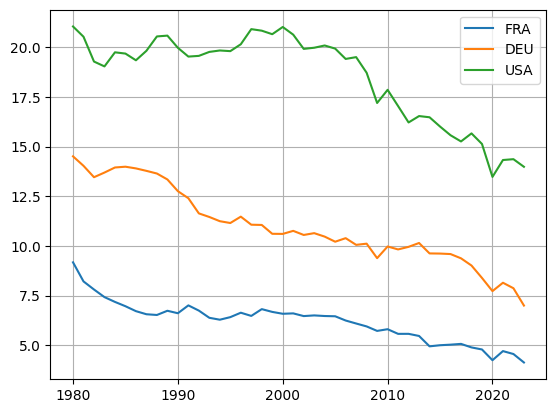

In [30]:
column_to_plot = 'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)'
# column_to_plot = 'Military expenditure (% of GDP)'
# column_to_plot = 'Military expenditure per capita (current USD)'
# column_to_plot = 'Population'
# column_to_plot = 'External balance on goods and services (% of GDP)'
# column_to_plot = 'Gross domestic savings (% of GDP)'
# column_to_plot = 'Inflation, GDP deflator (annual %)'

fig, ax = plt.subplots(1,1)

ax.plot(data_melt_pivot_FRA_pdf['Year'], data_melt_pivot_FRA_pdf[column_to_plot], label='FRA')
ax.plot(data_melt_pivot_DEU_pdf['Year'], data_melt_pivot_DEU_pdf[column_to_plot], label='DEU')
ax.plot(data_melt_pivot_USA_pdf['Year'], data_melt_pivot_USA_pdf[column_to_plot], label='USA')

ax.legend()
ax.grid()

* Donald Trump first term: 2017-01-20 till 2021-01-20 --> You see a small peak in the graph above.
* France has so low carbon emissions because of the high rate of atomic energy.

In [31]:
data_melt_pivot_pdf

Series Name,Country Name,Country Code,Country Numeric,Year,Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),External balance on goods and services (% of GDP),GDP (current US$),GDP growth (annual %),GDP per capita (current US$),GDP per capita growth (annual %),Gross domestic savings (% of GDP),"Inflation, GDP deflator (annual %)",Military expenditure (% of GDP),Military expenditure (current USD),Tax revenue (% of GDP),Population,Military expenditure per capita (current USD)
0,France,FRA,1,1980,9.173360,-1.244458,6.945292e+11,1.676413,12565.163938,1.134990,24.871926,11.546088,3.155205,2.219818e+10,NaN,55274184.0,401.601279
1,France,FRA,1,1981,8.213742,-1.244260,6.091848e+11,1.188315,10955.900300,0.589285,22.607951,11.480776,3.246133,2.004775e+10,NaN,55603353.0,360.549369
2,France,FRA,1,1982,7.806652,-2.373652,5.781523e+11,2.442513,10359.892066,2.069073,21.803060,12.032713,3.223839,1.891849e+10,NaN,55806789.0,338.999836
3,France,FRA,1,1983,7.423744,-0.114349,5.533563e+11,1.262058,9862.284494,0.717849,21.909800,9.612537,3.237132,1.818852e+10,NaN,56108330.0,324.167914
4,France,FRA,1,1984,7.182425,0.411779,5.250333e+11,1.609471,9311.894265,1.114328,21.822314,7.073275,3.187369,1.697787e+10,NaN,56383085.0,301.116309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,United States,USA,0,2019,15.127925,-2.680086,2.153998e+13,2.583825,65604.681520,2.117740,18.989723,1.650466,3.412158,7.343441e+11,9.885825,328329953.0,2236.604042
128,United States,USA,0,2020,13.471131,-2.932467,2.135410e+13,-2.163029,64411.373178,-3.106490,18.486352,1.328833,3.650514,7.783972e+11,10.196305,331526933.0,2347.915426
129,United States,USA,0,2021,14.320730,-3.631700,2.368117e+13,6.055053,71318.307359,5.888314,17.701578,4.565986,3.417094,8.062302e+11,11.258826,332048977.0,2428.046029
130,United States,USA,0,2022,14.362560,-3.687234,2.600689e+13,2.512375,78035.175360,2.136362,18.262543,7.129481,3.343259,8.606922e+11,12.054833,333271411.0,2582.556354


In [32]:
# data_onlycountries_without_nan_unpivot_feature_format_pdf.index

data_melt_pivot_pdf.drop(columns=['Country Name', 'Country Code']).corr()

Series Name,Country Numeric,Year,Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),External balance on goods and services (% of GDP),GDP (current US$),GDP growth (annual %),GDP per capita (current US$),GDP per capita growth (annual %),Gross domestic savings (% of GDP),"Inflation, GDP deflator (annual %)",Military expenditure (% of GDP),Military expenditure (current USD),Tax revenue (% of GDP),Population,Military expenditure per capita (current USD)
Series Name,,,,,,,,,,,,,,,
Country Numeric,1.000000e+00,-7.725293e-15,-0.572650,0.667480,-0.630115,-0.206716,-0.208719,-0.052749,0.771964,-0.123298,-0.783505,-0.743741,NaN,-0.808668,-0.767384
Year,-7.725293e-15,1.000000e+00,-0.285897,0.202086,0.465599,-0.182926,0.907551,-0.145008,-0.023469,-0.411466,-0.435465,0.307744,-0.214906,0.129102,0.408497
Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),-5.726499e-01,-2.858968e-01,1.000000,-0.500008,0.516933,0.256732,-0.000955,0.147037,-0.494283,0.096234,0.732160,0.629036,0.267484,0.838236,0.528991
External balance on goods and services (% of GDP),6.674795e-01,2.020865e-01,-0.500008,1.000000,-0.469238,-0.176246,0.011604,-0.079211,0.831724,-0.211893,-0.639844,-0.582177,0.220902,-0.590327,-0.569085
GDP (current US$),-6.301153e-01,4.655991e-01,0.516933,-0.469238,1.000000,0.099086,0.743393,0.035718,-0.649486,-0.074242,0.356751,0.964479,-0.167065,0.866234,0.944063
GDP growth (annual %),-2.067158e-01,-1.829258e-01,0.256732,-0.176246,0.099086,1.000000,-0.087171,0.975179,-0.007214,-0.024802,0.216619,0.123096,0.192390,0.192470,0.094058
GDP per capita (current US$),-2.087187e-01,9.075514e-01,-0.000955,0.011604,0.743393,-0.087171,1.000000,-0.075788,-0.213962,-0.317462,-0.203249,0.600829,-0.171526,0.426123,0.670412
GDP per capita growth (annual %),-5.274916e-02,-1.450081e-01,0.147037,-0.079211,0.035718,0.975179,-0.075788,1.000000,0.090105,-0.051945,0.086338,0.033502,0.170961,0.073488,0.002542
Gross domestic savings (% of GDP),7.719638e-01,-2.346893e-02,-0.494283,0.831724,-0.649486,-0.007214,-0.213962,0.090105,1.000000,0.010604,-0.625575,-0.758586,0.587845,-0.715179,-0.760906


In [33]:
list(data_melt_pivot_pdf.columns)

['Country Name',
 'Country Code',
 'Country Numeric',
 'Year',
 'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)',
 'External balance on goods and services (% of GDP)',
 'GDP (current US$)',
 'GDP growth (annual %)',
 'GDP per capita (current US$)',
 'GDP per capita growth (annual %)',
 'Gross domestic savings (% of GDP)',
 'Inflation, GDP deflator (annual %)',
 'Military expenditure (% of GDP)',
 'Military expenditure (current USD)',
 'Tax revenue (% of GDP)',
 'Population',
 'Military expenditure per capita (current USD)']

In [34]:
filter_columns = [
    "Country Code",
    'Country Numeric',
    "Year",
    "Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)",
    "External balance on goods and services (% of GDP)",
    "GDP per capita (current US$)",
    "GDP per capita growth (annual %)",
    "Gross domestic savings (% of GDP)",
    "Inflation, GDP deflator (annual %)",
    "Military expenditure per capita (current USD)",
]

data_melt_pivot_pdf = data_melt_pivot_pdf[filter_columns]

In [35]:
data_melt_pivot_FRA_pdf = data_melt_pivot_pdf[data_melt_pivot_pdf['Country Code']=='FRA']
data_melt_pivot_DEU_pdf = data_melt_pivot_pdf[data_melt_pivot_pdf['Country Code']=='DEU']
data_melt_pivot_USA_pdf = data_melt_pivot_pdf[data_melt_pivot_pdf['Country Code']=='USA']

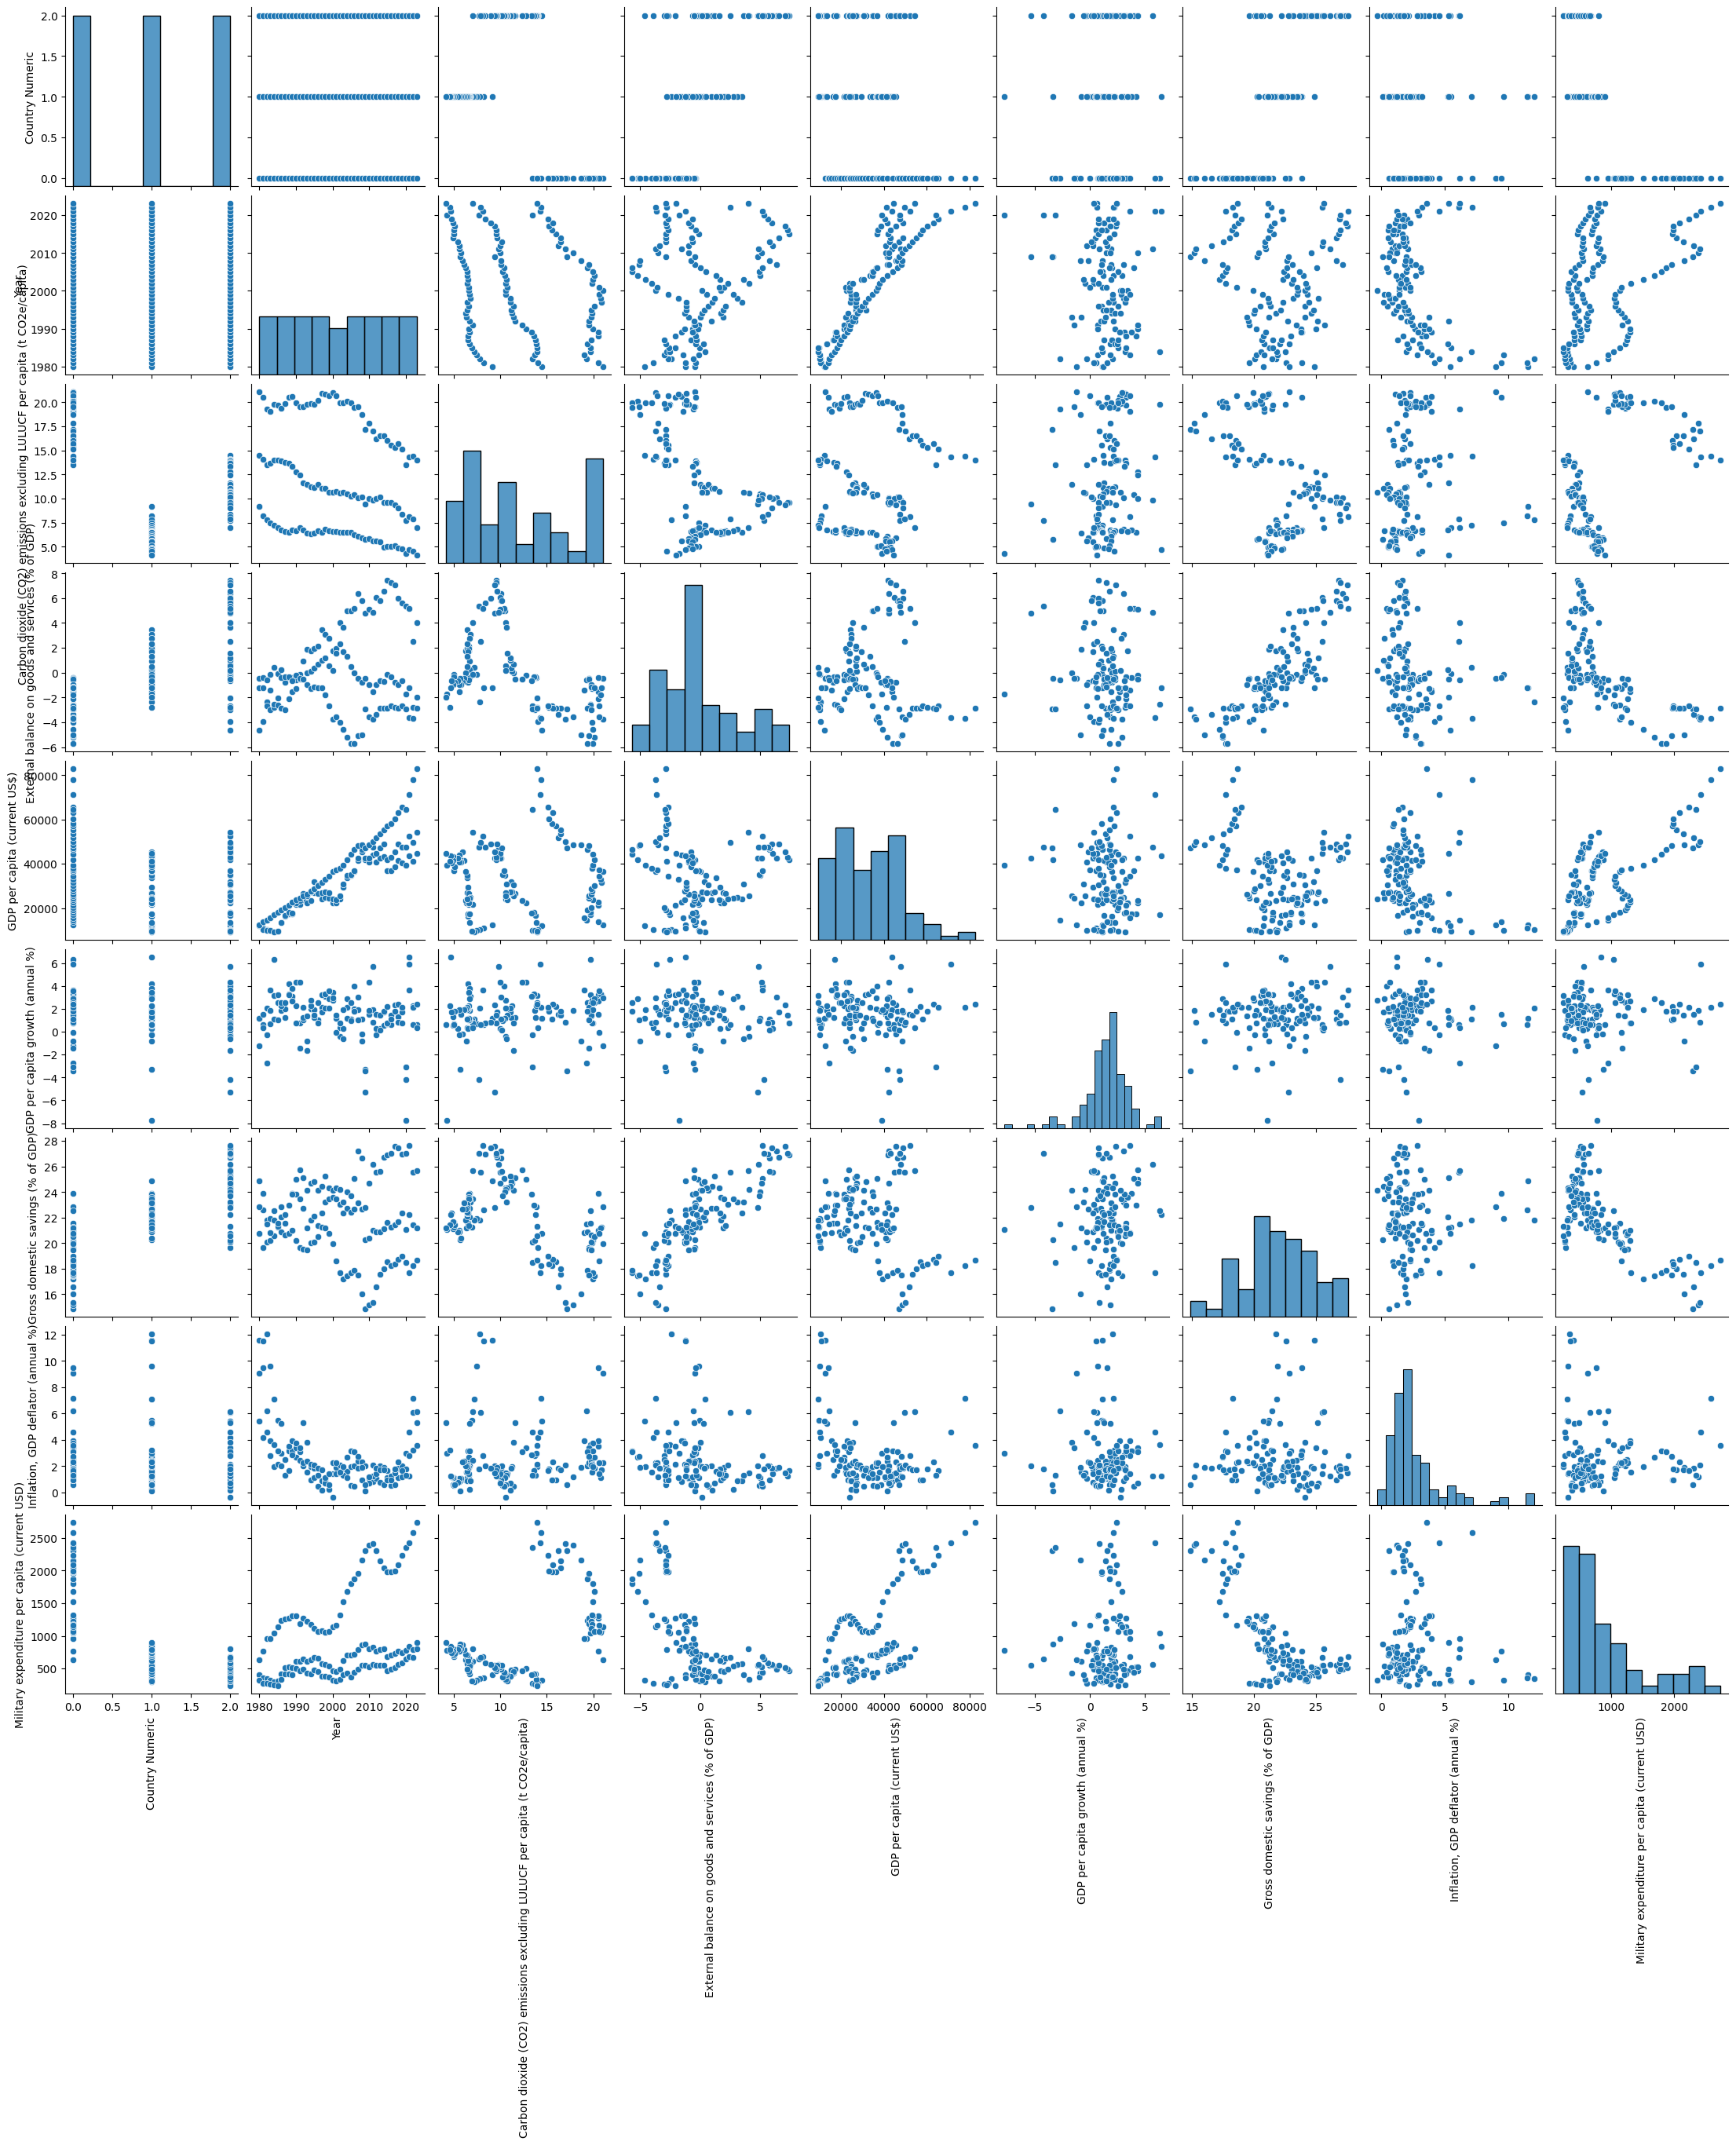

In [36]:
pg = sns.pairplot(data_melt_pivot_pdf.drop(columns=['Country Code']))

for ax in pg.axes.flatten().tolist():
    ax.set_xlabel(xlabel=ax.get_xlabel(), rotation=90)
    ax.set_ylabel(ylabel=ax.get_ylabel(), rotation=90)

plt.show()

In [37]:
data_melt_pivot_FRA_pdf.drop(columns=['Country Code']).corr()

Series Name,Country Numeric,Year,Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),External balance on goods and services (% of GDP),GDP per capita (current US$),GDP per capita growth (annual %),Gross domestic savings (% of GDP),"Inflation, GDP deflator (annual %)",Military expenditure per capita (current USD)
Series Name,,,,,,,,,
Country Numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,NaN,1.000000,-0.920419,-0.280327,0.939818,-0.189390,-0.439579,-0.595765,0.854536
Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),NaN,-0.920419,1.000000,0.303828,-0.833590,0.198787,0.561778,0.616489,-0.795889
External balance on goods and services (% of GDP),NaN,-0.280327,0.303828,1.000000,-0.291708,0.148528,0.309767,-0.368230,-0.276448
GDP per capita (current US$),NaN,0.939818,-0.833590,-0.291708,1.000000,-0.189481,-0.428371,-0.624174,0.959767
GDP per capita growth (annual %),NaN,-0.189390,0.198787,0.148528,-0.189481,1.000000,0.413990,-0.020408,-0.193550
Gross domestic savings (% of GDP),NaN,-0.439579,0.561778,0.309767,-0.428371,0.413990,1.000000,0.218681,-0.416413
"Inflation, GDP deflator (annual %)",NaN,-0.595765,0.616489,-0.368230,-0.624174,-0.020408,0.218681,1.000000,-0.646942
Military expenditure per capita (current USD),NaN,0.854536,-0.795889,-0.276448,0.959767,-0.193550,-0.416413,-0.646942,1.000000


In [38]:
data_melt_pivot_DEU_pdf.drop(columns=['Country Code']).corr()

data_melt_pivot_DEU_pdf.shape

(44, 10)

In [39]:
data_melt_pivot_USA_pdf.drop(columns=['Country Code']).corr()

Series Name,Country Numeric,Year,Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),External balance on goods and services (% of GDP),GDP per capita (current US$),GDP per capita growth (annual %),Gross domestic savings (% of GDP),"Inflation, GDP deflator (annual %)",Military expenditure per capita (current USD)
Series Name,,,,,,,,,
Country Numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,NaN,1.000000,-0.821836,-0.547368,0.986036,-0.057508,-0.737549,-0.400917,0.908054
Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),NaN,-0.821836,1.000000,0.214021,-0.852830,0.111960,0.487646,0.151857,-0.849126
External balance on goods and services (% of GDP),NaN,-0.547368,0.214021,1.000000,-0.524545,-0.098029,0.669918,0.313870,-0.565079
GDP per capita (current US$),NaN,0.986036,-0.852830,-0.524545,1.000000,-0.025685,-0.673247,-0.287244,0.914479
GDP per capita growth (annual %),NaN,-0.057508,0.111960,-0.098029,-0.025685,1.000000,0.269308,-0.034829,-0.118068
Gross domestic savings (% of GDP),NaN,-0.737549,0.487646,0.669918,-0.673247,0.269308,1.000000,0.520245,-0.802719
"Inflation, GDP deflator (annual %)",NaN,-0.400917,0.151857,0.313870,-0.287244,-0.034829,0.520245,1.000000,-0.297298
Military expenditure per capita (current USD),NaN,0.908054,-0.849126,-0.565079,0.914479,-0.118068,-0.802719,-0.297298,1.000000


In [40]:
data_melt_pivot_pdf.drop(columns=['Country Code']).corr()

Series Name,Country Numeric,Year,Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),External balance on goods and services (% of GDP),GDP per capita (current US$),GDP per capita growth (annual %),Gross domestic savings (% of GDP),"Inflation, GDP deflator (annual %)",Military expenditure per capita (current USD)
Series Name,,,,,,,,,
Country Numeric,1.000000e+00,-7.725293e-15,-0.572650,0.667480,-0.208719,-0.052749,0.771964,-0.123298,-0.767384
Year,-7.725293e-15,1.000000e+00,-0.285897,0.202086,0.907551,-0.145008,-0.023469,-0.411466,0.408497
Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),-5.726499e-01,-2.858968e-01,1.000000,-0.500008,-0.000955,0.147037,-0.494283,0.096234,0.528991
External balance on goods and services (% of GDP),6.674795e-01,2.020865e-01,-0.500008,1.000000,0.011604,-0.079211,0.831724,-0.211893,-0.569085
GDP per capita (current US$),-2.087187e-01,9.075514e-01,-0.000955,0.011604,1.000000,-0.075788,-0.213962,-0.317462,0.670412
GDP per capita growth (annual %),-5.274916e-02,-1.450081e-01,0.147037,-0.079211,-0.075788,1.000000,0.090105,-0.051945,0.002542
Gross domestic savings (% of GDP),7.719638e-01,-2.346893e-02,-0.494283,0.831724,-0.213962,0.090105,1.000000,0.010604,-0.760906
"Inflation, GDP deflator (annual %)",-1.232981e-01,-4.114664e-01,0.096234,-0.211893,-0.317462,-0.051945,0.010604,1.000000,-0.072259
Military expenditure per capita (current USD),-7.673845e-01,4.084974e-01,0.528991,-0.569085,0.670412,0.002542,-0.760906,-0.072259,1.000000


In [41]:
data_melt_pivot_pdf.head()

Series Name,Country Code,Country Numeric,Year,Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),External balance on goods and services (% of GDP),GDP per capita (current US$),GDP per capita growth (annual %),Gross domestic savings (% of GDP),"Inflation, GDP deflator (annual %)",Military expenditure per capita (current USD)
0,FRA,1,1980,9.173360,-1.244458,12565.163938,1.134990,24.871926,11.546088,401.601279
1,FRA,1,1981,8.213742,-1.244260,10955.900300,0.589285,22.607951,11.480776,360.549369
2,FRA,1,1982,7.806652,-2.373652,10359.892066,2.069073,21.803060,12.032713,338.999836
3,FRA,1,1983,7.423744,-0.114349,9862.284494,0.717849,21.909800,9.612537,324.167914
4,FRA,1,1984,7.182425,0.411779,9311.894265,1.114328,21.822314,7.073275,301.116309


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [43]:
X = data_melt_pivot_pdf.drop(columns=['Country Code', 'Country Numeric'])
y = data_melt_pivot_pdf['Country Code']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=60)

In [45]:
country_classifier_model = DecisionTreeClassifier(max_depth=10)

In [46]:
country_classifier_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

[Text(0.5555555555555556, 0.9166666666666666, 'x[7] <= 926.68\ngini = 0.663\nsamples = 99\nvalue = [38, 30, 31]'),
 Text(0.4444444444444444, 0.75, 'x[1] <= 6.983\ngini = 0.507\nsamples = 69\nvalue = [38, 30, 1]'),
 Text(0.5, 0.8333333333333333, 'True  '),
 Text(0.3333333333333333, 0.5833333333333334, 'gini = 0.0\nsamples = 27\nvalue = [0, 27, 0]'),
 Text(0.5555555555555556, 0.5833333333333334, 'x[6] <= 7.588\ngini = 0.176\nsamples = 42\nvalue = [38, 3, 1]'),
 Text(0.3333333333333333, 0.4166666666666667, 'x[1] <= 7.367\ngini = 0.05\nsamples = 39\nvalue = [38, 1, 0]'),
 Text(0.2222222222222222, 0.25, 'x[0] <= 2007.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.1111111111111111, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.4444444444444444, 0.25, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.7777777777777778, 0.4166666666666667, 'x[7] <= 516.981

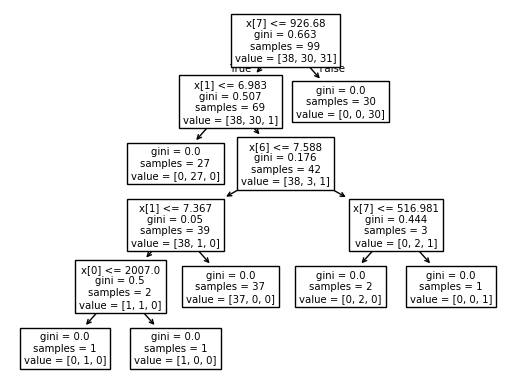

In [47]:
plot_tree(country_classifier_model)

In [48]:
y_pred = country_classifier_model.predict(X_test)

In [49]:
print(f'accuracy: {accuracy_score(y_pred=y_pred, y_true=y_test)}')
print(f'recall: {recall_score(y_pred=y_pred, y_true=y_test, average='macro')}')
print(f'f1: {f1_score(y_pred=y_pred, y_true=y_test, average='macro')}')
print(f'precision: {precision_score(y_pred=y_pred, y_true=y_test, average='macro')}')

accuracy: 1.0
recall: 1.0
f1: 1.0
precision: 1.0
